In [1]:
%cd ..

/home/tianshu/prediction


In [2]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
from tqdm.notebook import tqdm

from dataset import Dataset
from plot import Result, Method

/home/tianshu/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
ds = Dataset("data.npz", offset=1000. * 1000.)

with open("results/manifest.json") as f:
    methods = json.load(f)
    
results = {
    method: Method("results/{}".format(method), ds, desc)
    for method, desc in tqdm(methods.items())
}

  0%|          | 0/8 [00:00<?, ?it/s]

In [4]:
def plots(subset, ax=None, boxplot=True, baseline=True):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    colors = ["C{}".format(i + 1) for i in range(len(subset))]
    legend = [methods[m] for m in subset]
    for color, method in zip(colors, subset):
        results[method].compare(ax, color=color, baseline=False, boxplot=boxplot)

    if baseline:
        colors = ["C0"] + colors
        legend = ["Baseline"] + legend
        results["embedding"].compare(ax, color='C0', baseline=True, boxplot=boxplot)
        
    ax.legend([Line2D([0], [0], color=c, lw=2) for c in colors], legend)

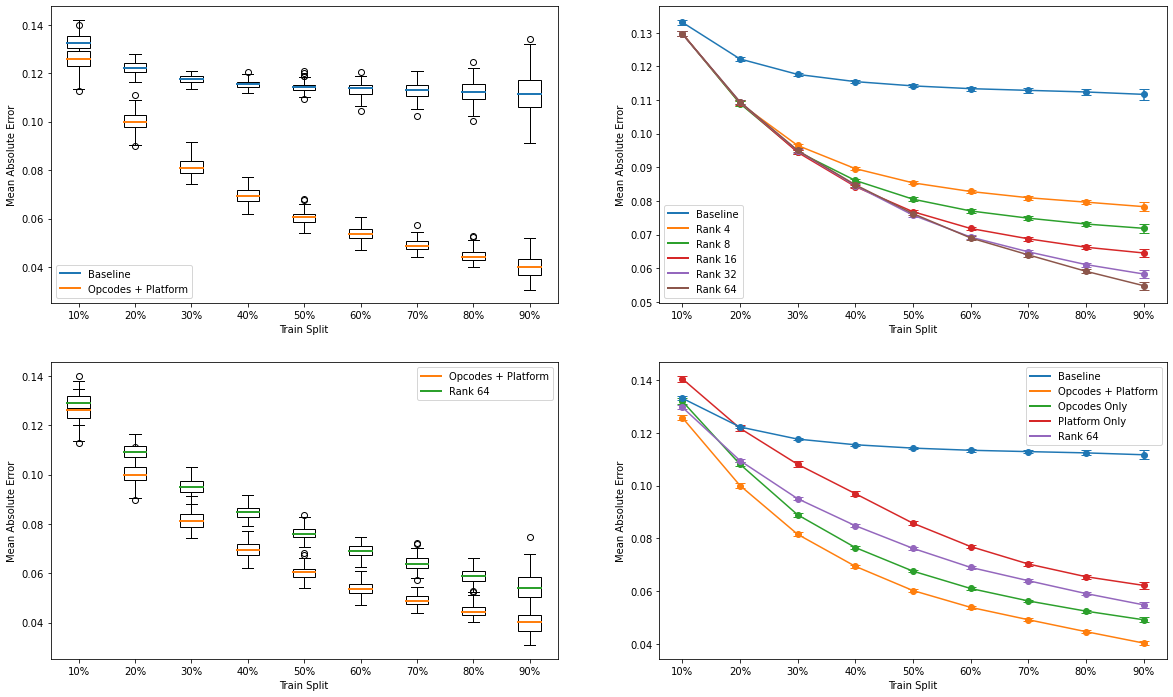

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

plots(["embedding"], ax=axs[0, 0])
plots(["linear4", "linear8", "linear16", "linear32", "linear64"], ax=axs[0, 1], boxplot=False)
plots(["embedding", "linear64"], ax=axs[1, 0], baseline=False)
plots(["embedding", "module_only", "runtime_only", "linear64"], ax=axs[1, 1], boxplot=False)

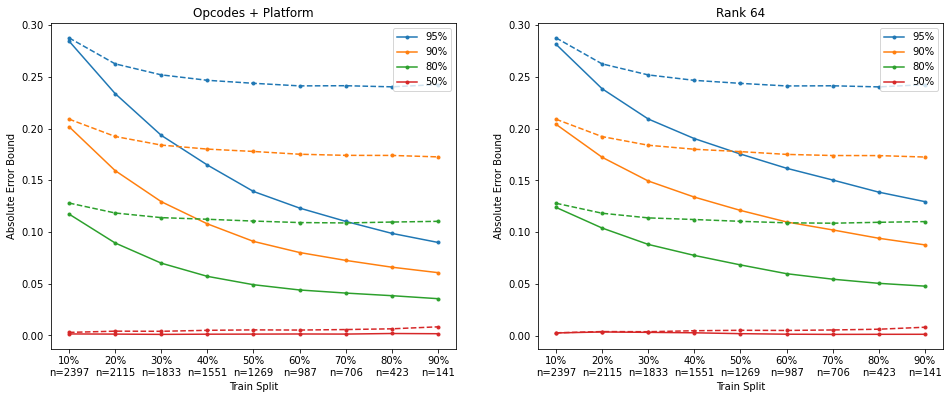

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

subset = ["embedding", "linear64"]
for method, ax in zip(subset, axs):
    results[method].bounds(ax)
    ax.set_title(methods[method])